In [ ]:
# Displaying 2019 IMD data for the new 2022 wards.

In [ ]:
# Dependencies
!pip install --upgrade geopandas mapclassify

     |████████████████████████████████| 1.0 MB 19.9 MB/s 
     |████████████████████████████████| 6.3 MB 28.6 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 


In [ ]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive

Data
==


GDrive mount
--

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
ward_dir = f"{project_dir}/boundaries/2022_wards"
imd_dir = f"{project_dir}/deprivation"

# Outputs
out_dir = f"{project_dir}/deprivation/maps"

In [ ]:
!mkdir -p "{out_dir}"

In [ ]:
!ls -lh "{oa_dir}"/*lsoa*.gpkg

-rw------- 1 root root 152K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_200m.gpkg
-rw------- 1 root root 216K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_20m.gpkg
-rw------- 1 root root 120K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_centroids.gpkg
-rw------- 1 root root 1.5M Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_full.gpkg


In [ ]:
!ls -lh "{ward_dir}"/*.gpkg

-rw------- 1 root root 292K Nov  1 14:53 /content/gdrive/MyDrive/WardProfiles/boundaries/2022_wards/lbl_wd22_proposed.gpkg


In [ ]:
!ls -lh "{imd_dir}" 

total 1.4M
-rw------- 1 root root 1.4M Sep 25  2019 File_1_-_IMD2019_Index_of_Multiple_Deprivation.xlsx
-rw------- 1 root root  11K Nov  4 13:09 lbl_imd_lsoa11.csv
drwx------ 2 root root 4.0K Nov  4 14:05 maps


Ward & LSOA geometry
--

In [ ]:
# Ward22 geometry
wd22 = gpd.read_file(f"{ward_dir}/lbl_wd22_proposed.gpkg")
len(wd22)

19

In [ ]:
# OA geometry
lsoa11 = gpd.read_file(f"{oa_dir}/lbl_lsoa11_20m.gpkg")
len(lsoa11)

169

IMD data & geometry at LSOA level
--


In [ ]:
d = pd.read_csv(f"{imd_dir}/lbl_imd_lsoa11.csv")
print(len(d))
d.head()

169


,LSOA11CD,LSOA11NM,LAD19CD,LAD19NM,IMD_rank,IMD_decile,WD22CD_proposed
0,E01003189,Lewisham 034A,E09000023,Lewisham,3400,2,E05013714
1,E01003190,Lewisham 034B,E09000023,Lewisham,5993,2,E05013714
2,E01003191,Lewisham 034C,E09000023,Lewisham,5923,2,E05013714
3,E01003192,Lewisham 034D,E09000023,Lewisham,2371,1,E05013714
4,E01003193,Lewisham 029A,E09000023,Lewisham,7450,3,E05013729


In [ ]:
lsoa_imd = lsoa11.merge(d, on='LSOA11CD')#.dissolve(by='WD22CD_proposed')
print(len(lsoa_imd))
lsoa_imd.head()

169 169


,OBJECTID,LSOA11CD,LSOA11NM_x,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,LSOA11NM_y,LAD19CD,LAD19NM,IMD_rank,IMD_decile,WD22CD_proposed
0,3122,E01003189,Lewisham 034A,Lewisham 034A,537582,171828,-0.02233,51.42876,1.885645e+05,2344.244488,"POLYGON ((537627.388 171966.710, 537672.224 17...",Lewisham 034A,E09000023,Lewisham,3400,2,E05013714
1,3123,E01003190,Lewisham 034B,Lewisham 034B,536718,171642,-0.03482,51.42730,3.289821e+05,2927.463701,"POLYGON ((536762.977 172026.305, 536751.439 17...",Lewisham 034B,E09000023,Lewisham,5993,2,E05013714
2,3124,E01003191,Lewisham 034C,Lewisham 034C,537247,171535,-0.02726,51.42621,1.998734e+05,2908.381776,"POLYGON ((537079.289 171863.491, 537091.383 17...",Lewisham 034C,E09000023,Lewisham,5923,2,E05013714
3,3125,E01003192,Lewisham 034D,Lewisham 034D,537962,170926,-0.01722,51.42056,1.018509e+06,5626.055845,"POLYGON ((537479.990 171676.902, 537586.569 17...",Lewisham 034D,E09000023,Lewisham,2371,1,E05013714
4,3126,E01003193,Lewisham 029A,Lewisham 029A,536720,172067,-0.03463,51.43111,3.460524e+05,3569.935721,"POLYGON ((536609.078 172387.938, 536638.293 17...",Lewisham 029A,E09000023,Lewisham,7450,3,E05013729


Ward-level summary stats
--

In [ ]:
# Get Ward names -- we can take them from the WD22 boundaries data
wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()
lsoa_imd['WD22NM_proposed'] = lsoa_imd.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])
lsoa_imd.WD22NM_proposed.unique()

array(['Bellingham', 'Perry Vale', 'Rushey Green', 'Blackheath',
       'Brockley', 'Catford South', 'Hither Green', 'Crofton Park',
       'Downham', 'Evelyn', 'New Cross Gate', 'Deptford', 'Forest Hill',
       'Grove Park', 'Ladywell', 'Lee Green', 'Lewisham Central',
       'Sydenham', 'Telegraph Hill'], dtype=object)

Text(0, 0.5, 'Number of Lewisham LSOAs')

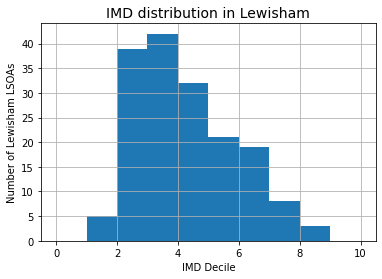

In [ ]:
# Number of LSOAs per decile
lsoa_imd.IMD_decile.hist(bins=range(0,11))
plt.title('IMD distribution in Lewisham', size=14)
plt.xlabel('IMD Decile')
plt.ylabel('Number of Lewisham LSOAs')

In [ ]:
len(lsoa_imd[lsoa_imd.IMD_decile==2]), len(lsoa_imd[lsoa_imd.IMD_decile<=2])

(39, 44)

In [ ]:
# LSOAs in botton deciles
pd.concat({
    'Number of LSOAs': lsoa_imd.groupby('WD22NM_proposed').WD22NM_proposed.count(),
    'LSOAs in botton 20%': lsoa_imd[lsoa_imd.IMD_decile<=2].groupby('WD22NM_proposed').WD22NM_proposed.count()
}, axis=1).fillna(0).astype(int)

,Number of LSOAs,LSOAs in botton 20%
Bellingham,6,6
Blackheath,10,1
Brockley,12,1
Catford South,9,0
Crofton Park,9,0
Deptford,8,7
Downham,12,7
Evelyn,6,0
Forest Hill,9,0
Grove Park,9,2


Map
--

In [ ]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

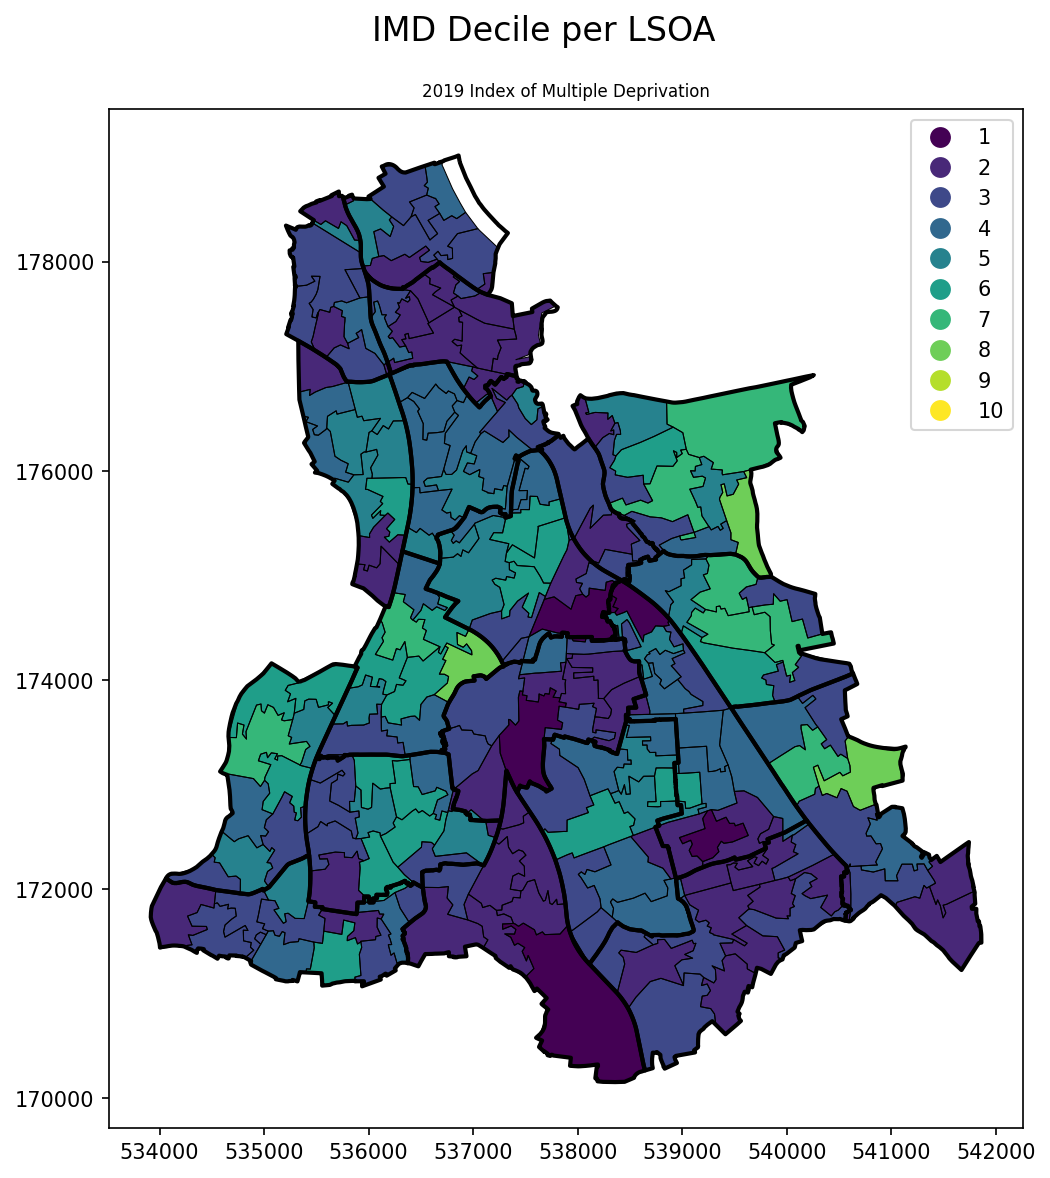

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('IMD Decile per LSOA', fontsize=16, y=.95)
plt.title('2019 Index of Multiple Deprivation', fontsize=8)
bins = range(1,11) # 1..10
bin_labels = [str(v) for v in bins]
lsoa_imd.plot(ax=ax, column='IMD_decile', 
              legend=True,
              # mapclassify parameters for breaks
              # See https://pysal.org/mapclassify/api.html
              scheme='UserDefined', 
              classification_kwds={
                  'bins': bins 
              },
              legend_kwds={
                  'labels': bin_labels
              }
              #legend_labels=lsoa_imd.IMD_decile
              ) 
lsoa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
# plt.legend()

plt.savefig(f"{out_dir}/lbl_lsoa11_wd22_imd_decile.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_lsoa11_wd22_imd_decile.pdf")